[1] 모듈 임포트

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

[2] 데이터셋 로딩 및 확인

In [2]:
# 붓꽃 데이터 셋 로딩
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
# iris 데이터
iris['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [5]:
# iris 컬럼명
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
# iris 타겟
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
# iris 타겟 이름
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

[3] 데이터프레임으로 변환

In [8]:
# 딕셔너리를 데이터프레임으로 변환
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
# 타겟 열 추가
target_name = []
for i in iris['target']:
    target_name.append(iris['target_names'][i])

iris_df['target_name'] = target_name
iris_df['target'] = iris['target']
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_name,target
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


[4] 결측치 확인

In [10]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target_name        150 non-null    object 
 5   target             150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [11]:
iris_df['sepal length (cm)'].unique()

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 5.5,
       4.5, 5.3, 7. , 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
       6.2, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

In [12]:
iris_df['sepal width (cm)'].unique()

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, 3.7, 4. , 4.4, 3.8, 3.3,
       4.1, 4.2, 2.3, 2.8, 2.4, 2.7, 2. , 2.2, 2.5, 2.6])

In [13]:
iris_df['petal length (cm)'].unique()

array([1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1. , 1.9, 4.7, 4.5, 4.9, 4. ,
       4.6, 3.3, 3.9, 3.5, 4.2, 3.6, 4.4, 4.1, 4.8, 4.3, 5. , 3.8, 3.7,
       5.1, 3. , 6. , 5.9, 5.6, 5.8, 6.6, 6.3, 6.1, 5.3, 5.5, 6.7, 6.9,
       5.7, 6.4, 5.4, 5.2])

In [14]:
iris_df['petal width (cm)'].unique()

array([0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, 1.6, 1. , 1.1, 1.8,
       1.2, 1.7, 2.5, 1.9, 2.1, 2.2, 2. , 2.4, 2.3])

> 결측치는 없는 것 같음

[5] 이상치 확인

In [15]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


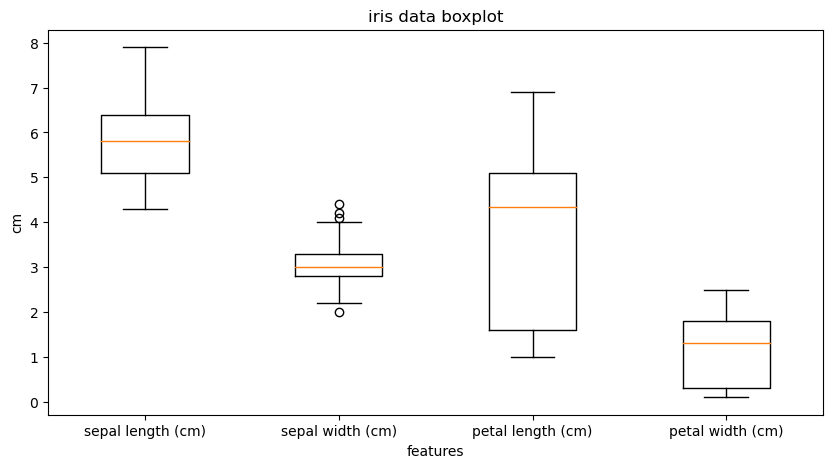

In [16]:
# boxplot으로 이상치 확인
plt.figure(figsize=(10, 5))
plt.boxplot(iris_df.iloc[:, :4])
plt.xlabel('features')
plt.ylabel('cm')
plt.xticks(np.arange(1, 5), iris_df.columns[:4])
plt.title('iris data boxplot')
plt.show()

> 이상치가 존재하긴 하지만 크게 벗어나지 않으므로 제거하지 않기로 결정

[6] EDA (탐색적 자료 분석)

In [17]:
iris_df.corr(numeric_only=True)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [18]:
def draw_scatter(x, y):
    plt.scatter(iris_df[x], iris_df[y], label = f"corr : {round(iris_df.corr(numeric_only=True).loc[x, y],2)}")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'({x[:-5]}, {y[:-5]}) scatter plot')
    plt.legend()
    plt.show()

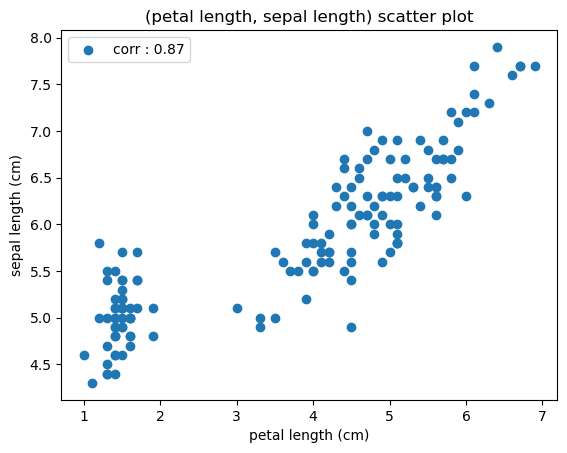

In [19]:
draw_scatter('petal length (cm)', 'sepal length (cm)')

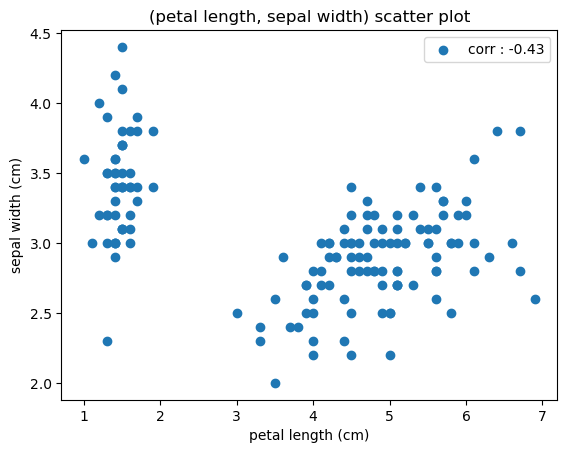

In [20]:
draw_scatter('petal length (cm)', 'sepal width (cm)')

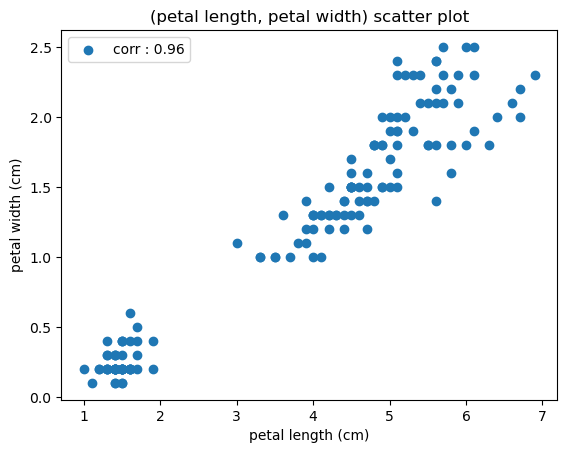

In [21]:
draw_scatter('petal length (cm)', 'petal width (cm)')

> petal length (cm)가 sepal length (cm), petal width (cm)와 상관계수가 높아 petal length (cm) 하나로도 나머지 두 변수를 충분히 설명할 수 있을 것으로 판단되어 최종 피쳐로 petal length (cm)와 sepal width (cm)를 선택

[7] 피쳐와 타겟 분리

In [22]:
features = iris_df.iloc[:,[1,2]]
target = iris_df.iloc[:,-1]
features.head(), target.head()

(   sepal width (cm)  petal length (cm)
 0               3.5                1.4
 1               3.0                1.4
 2               3.2                1.3
 3               3.1                1.5
 4               3.6                1.4,
 0    0
 1    0
 2    0
 3    0
 4    0
 Name: target, dtype: int64)

In [23]:
print(f'features => {features.shape}, {features.ndim}D')
print(f'target => {target.shape}, {target.ndim}D')

features => (150, 2), 2D
target => (150,), 1D


[8] 데이터셋 준비 (학습, 테스트)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(features, target, stratify = target,
                                                    train_size = 0.8,  random_state = 42)

In [25]:
print(f'X_train : {X_train.shape}, {X_train.ndim}D')
print(f'y_train : {y_train.shape}, {y_train.ndim}D')

print(f'X_test : {X_test.shape}, {X_test.ndim}D')
print(f'y_test : {y_test.shape}, {y_test.ndim}D')

X_train : (120, 2), 2D
y_train : (120,), 1D
X_test : (30, 2), 2D
y_test : (30,), 1D


[9] 피쳐 스케일링

In [26]:
mmScaler = MinMaxScaler() # 인스턴스 생성
mmScaler.fit(X_train)

MinMaxScaler()

In [27]:
X_train_scaled = mmScaler.transform(X_train)
X_test_scaled = mmScaler.transform(X_test)

X_train_scaled[:5,:], X_test_scaled[:5,:]

(array([[0.375     , 0.05172414],
        [0.20833333, 0.5862069 ],
        [0.33333333, 0.63793103],
        [0.45833333, 0.06896552],
        [0.20833333, 0.5       ]]),
 array([[0.41666667, 0.03448276],
        [0.41666667, 0.65517241],
        [0.16666667, 0.37931034],
        [0.125     , 0.37931034],
        [0.5       , 0.03448276]]))

In [28]:
print(f"스케일링 전 최솟값 : {mmScaler.data_min_}, 스케일링 후 최솟값 : {mmScaler.min_}")
print(f"스케일링 전 최댓값 : {mmScaler.data_max_}, 스케일링 후 최댓값 : {mmScaler.scale_}")

스케일링 전 최솟값 : [2.  1.1], 스케일링 후 최솟값 : [-0.83333333 -0.18965517]
스케일링 전 최댓값 : [4.4 6.9], 스케일링 후 최댓값 : [0.41666667 0.17241379]


In [29]:
model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_jobs=-1)

In [30]:
model.score(X_test_scaled, y_test)

0.9333333333333333

[9] 테스트 데이터를 생성하여 이웃 확인

In [31]:
# 테스트 데이터에서 값 하나 추출
X_test.iloc[0,:]

sepal width (cm)     3.0
petal length (cm)    1.3
Name: 38, dtype: float64

In [32]:
# 비슷한 값으로 생성
test = pd.DataFrame([[3.12, 1.18]], columns = X_test.columns)
test

,sepal width (cm),petal length (cm)
0,3.12,1.18


In [33]:
# 피쳐 스케일링
test_scaled = mmScaler.transform(test)
test_scaled

array([[0.46666667, 0.0137931 ]])

In [34]:
# 붓꽃 종류 마스크 설정
setosa_mask = (y_train == 0)
versicolor_mask = (y_train == 1)
virginica_mask = (y_train == 2)

In [35]:
distance, indexes = model.kneighbors(test_scaled)
indexes

array([[ 47, 116,  58,  93,  80]])

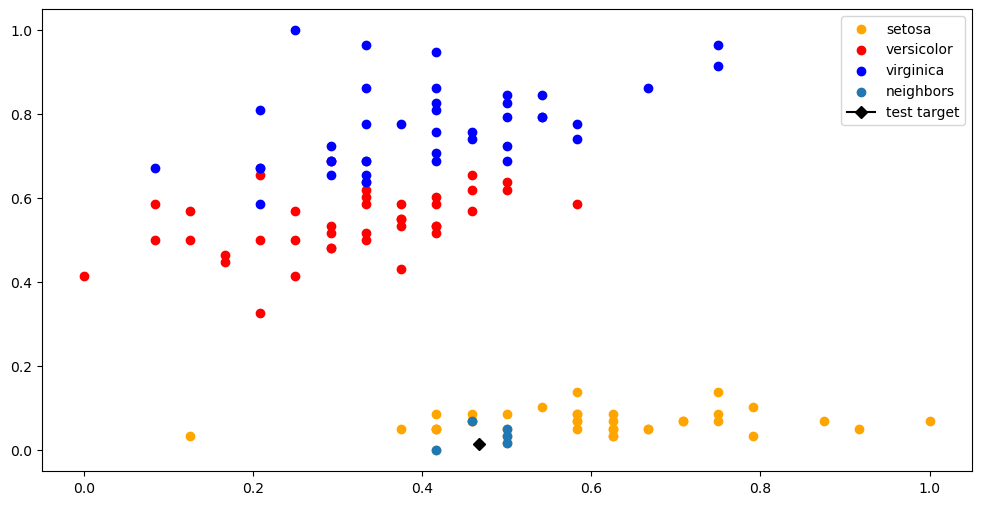

In [36]:
plt.figure(figsize=(12, 6))

mask_list = [setosa_mask, versicolor_mask, virginica_mask]
color_list = ['orange', 'red', 'blue']

for i in range(3):
    plt.scatter(X_train_scaled[mask_list[i], 0], X_train_scaled[mask_list[i], 1], color = color_list[i], label = iris['target_names'][i])

plt.scatter(X_train_scaled[indexes[0], 0], X_train_scaled[indexes[0], 1], label = 'neighbors')
plt.plot(test_scaled[0][0], test_scaled[0][1], marker = 'D', color = 'black', label = 'test target')
plt.legend()
plt.show()